<a href="https://colab.research.google.com/github/shivang915/BCS_109/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Governor Race By County**

This data shows the number of votes for governor races reported by each county. The number of votes reported is current_votes. Total Votes is the amount of registered voters in each county.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
df = pd.read_csv("https://raw.githubusercontent.com/shivang915/BCS_109/master/governors_county.csv")
pd.set_option('display.max_rows', 1025)
df.pop('state')
df.pop('county')

print(df)


      current_votes  total_votes  percent
0             85415        87025      100
1            280039       287633      100
2            127181       129352      100
3             14154        14209      100
4            168312       169082      100
5             36037        36235      100
6              4100         4114      100
7              5283         5350      100
8             38492        38520      100
9              8957         8981      100
10             9510         9510      100
11            15146        15198      100
12            57426        57869      100
13            12186        12267      100
14            12891        12949      100
15             4859         4944      100
16            11860        11954      100
17            25295        25383      100
18            12260        12235       95
19            19493        19628      100
20            47949        48191      100
21            21588        21770      100
22            74425        74425  

In [ ]:
df.describe() #Describes statistics of data, mean, median,

,current_votes,total_votes,percent
count,1.025000e+03,1.025000e+03,1025.000000
mean,1.992374e+04,2.013598e+04,99.497561
std,6.506058e+04,6.600077e+04,1.661326
min,5.000000e+00,5.000000e+00,80.000000
25%,1.089000e+03,1.109000e+03,100.000000
50%,3.778000e+03,3.844000e+03,100.000000
75%,1.323000e+04,1.341400e+04,100.000000
max,1.198049e+06,1.210507e+06,100.000000


In [ ]:
df.isnull().sum() #Tells you if there any null values in the data

current_votes    0
total_votes      0
percent          0
dtype: int64

In [ ]:
df.nunique()      #This tells you how many different values they are for each column?

state             11
county           864
current_votes    969
total_votes      981
percent           10
dtype: int64

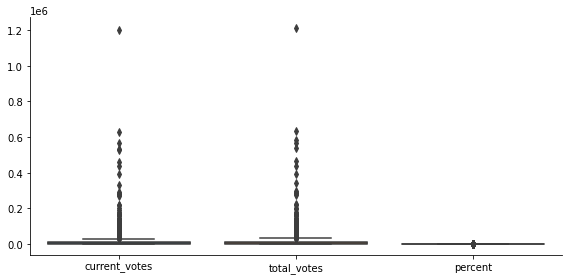

In [ ]:
sns.catplot(data=df, kind = 'box',  height = 4, aspect = 2) #Box plot shows distribution of current_votes, total_votes, and percentages

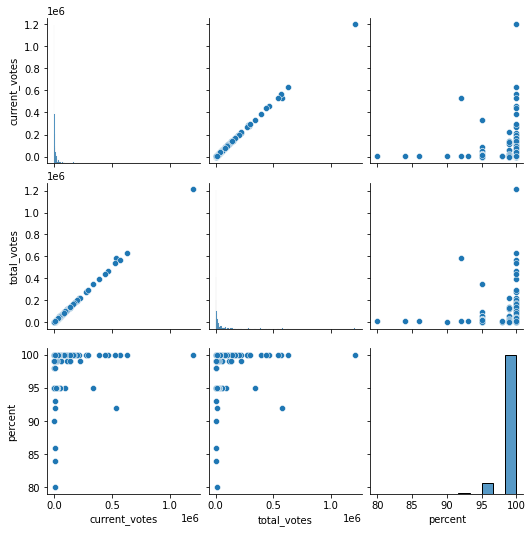

In [ ]:
sns.pairplot(df)


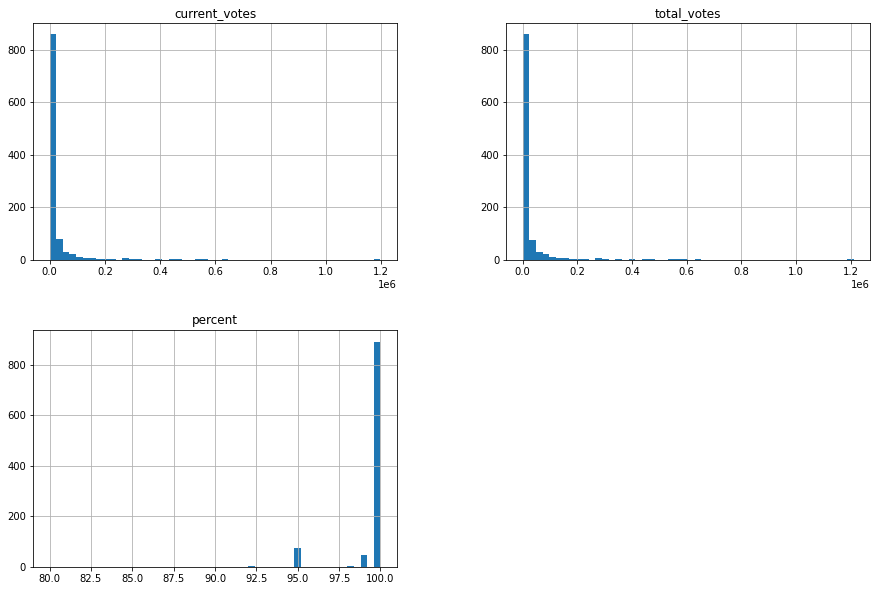

In [ ]:
df.hist(bins=50, figsize=(15,10))       #
plt.show()

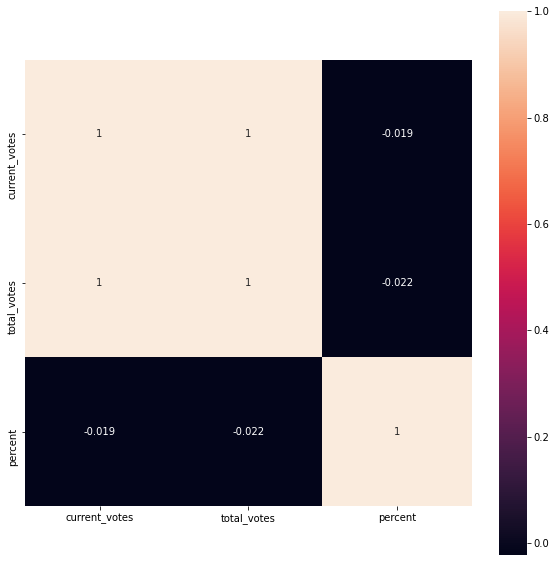

In [ ]:
corr = df.corr() #Visulaizes the data in 2-D matrix
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data=corr, square=True, annot=True, cbar = True, ax = ax)

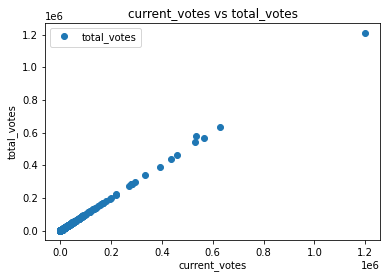

In [ ]:
df.plot(x='current_votes', y='total_votes', style='o')
plt.title('current_votes vs total_votes')
plt.xlabel('current_votes')
plt.ylabel('total_votes')
plt.show()

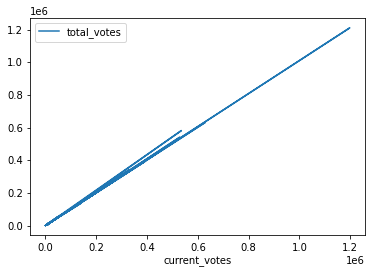

In [ ]:
df.plot(x="current_votes", y='total_votes')
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression
df.pop('state')
df.pop('county')
y = df['current_votes'].copy()
X = df.drop(['current_votes'], axis = 1)
lin_reg = LinearRegression().fit(X,y)
r_sq = lin_reg.score(X,y)
print(r_sq) #The R^2 value is very close to 1, meaning the data is very close to the fitted regression line.

0.9995618418709434


In [ ]:
y = df['total_votes'].copy()
X = df.drop(['total_votes'], axis = 1)
lin_reg = LinearRegression().fit(X,y)
r_sq = lin_reg.score(X,y)
print(r_sq) #The R^2 value is very close to 1, meaning the data is very close to the fitted regression line.

0.9995618951961355


In [4]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:          current_votes   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.251e+06
Date:                Tue, 15 Dec 2020   Prob (F-statistic):                        0.00
Time:                        18:13:12   Log-Likelihood:                         -8861.3
No. Observations:                1025   AIC:                                  1.773e+04
Df Residuals:                    1023   BIC:                                  1.774e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [14]:
#What is the total number of current_voters and total_voters?
df.sum(axis = 0, skipna = True) 

current_votes    20421832
total_votes      20639383
percent            101985
dtype: int64

In [24]:
#What is the percentage of overall voters that voted in the 2020 election?

x = 20421832/20639383*100
print(x)

98.94594232783025


In [27]:
#What percentage of people didn't vote 
print(x)
y = 100 - x
print(y)

98.94594232783025
1.0540576721697477
